# Setting things up

In [1]:
from general import *
from exp1 import *
import time
import pandas as pd
import multiprocessing as mp

random_state=42
np.random.seed(random_state)
cpu=mp.cpu_count() 
cpu

8

In [18]:
####
alpha=.05 #Significance level
iterations=48 #MC simulations to calculate type-1 error and power
ps=[75] #Z dim
m=400 #Training set size
n=100 #Test set size
B=100 #Number of permutations/samplings (RESIT,CRT,CPT)
npar = 7 #Number of different values for parameters like gamma, theta, c etc.
nbas = 1 #Number of different generative configurations (different pairs (a,b))

####
skews = [0]
losses = ['mse']

In [19]:
(((iterations*nbas*len(skews)*len(losses)*len(ps)))/(100*30))*(160/60)

0.042666666666666665

# Experiments

In [20]:
results = {'set':[], 'p':[],
           'ba':[], 'c':[], 'theta':[], 'skew':[], 'gamma':[], 'loss':[],
           'stfr':[], 'resit':[], 'gcm':[], 'crt':[], 'cpt':[],'rbpt':[], 'rbpt2':[]}

count=0

for p in ps:
    bas = [[np.random.normal(0, 1, p).reshape(p,1), np.random.normal(0, 1, p).reshape(p,1)] for j in range(nbas)]
    for ba in tqdm(bas):
        # Parameters a and b
        b = ba[0]
        a = ba[1]

        for skew in skews:
            for loss in losses:

                #### Type I error ####
                c = 0

                #STFR,RESIT,GCM,RBPT,RBPT2#
                tests={'stfr':False, 'resit':False, 'gcm':False, 'crt':False, 'cpt':False,'rbpt':False, 'rbpt2':True}
                theta=0
                gammas = np.linspace(0,.04,npar)
                for gamma in gammas:
                    # Running
                    pool = mp.Pool(cpu)
                    out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                    pool.close()
                    out = np.array(out).mean(axis=0)

                    # Storing results
                    results['set'].append('type1_1')
                    results['p'].append(p)
                    results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                    results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])

                #CRT,CPT,RBPT#
                tests={'stfr':False, 'resit':False, 'gcm':False, 'crt':False, 'cpt':False,'rbpt':False, 'rbpt2':False}
                thetas = np.linspace(0,6,npar)
                gamma = 0
                for theta in thetas:
                    # Running
                    pool = mp.Pool(cpu)
                    out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                    pool.close()
                    out = np.array(out).mean(axis=0)

                    # Storing results
                    results['set'].append('type1_2')
                    results['p'].append(p)
                    results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                    results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])


                #### Power ####
                tests={'stfr':False, 'resit':False, 'gcm':False, 'crt':False, 'cpt':True,'rbpt':True, 'rbpt2':True}
                cs = np.linspace(0,.5,npar)
                theta = 0
                gamma = 0
                for c in cs:
                    # Running
                    pool = mp.Pool(cpu)
                    out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                    pool.close()
                    out = np.array(out).mean(axis=0)

                    # Storing results
                    results['set'].append('power')
                    results['p'].append(p)
                    results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                    results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])

        # Update 'count'
        count+=1

100%|██████████| 1/1 [01:10<00:00, 70.19s/it]


## Saving results

In [21]:
results = pd.DataFrame(results)
#results.to_csv('rebut_results/2rebut_artificial_data_experiments_skew{:}.csv'.format(skew))


************ 75 ************


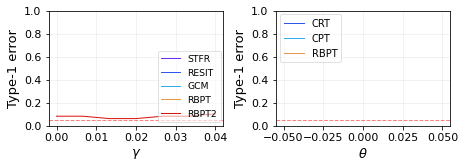

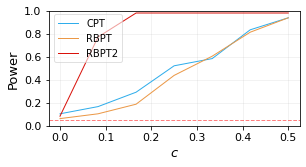

In [22]:
for p in ps:
    results_p = results.loc[results.p==p]
    for skew in skews:
        for loss in losses:
            print("\n************ {:} ************".format(p))
            ###
            plt.figure(figsize=(.9*8,1*2))
            plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
            plt.subplot(1, 2, 1)
            plot_type1(results_p, sett='type1_1', skew=skew, loss=loss, alpha=alpha, xlabel='$\gamma$', ylabel='Type-1 error', legend=True)
            plt.subplot(1, 2, 2)
            plot_type1(results_p, sett='type1_2', skew=skew, loss=loss, alpha=alpha, xlabel='$\\theta$', ylabel='Type-1 error', legend=True)
            plt.savefig('rebut_plots/2exp1_type1_{:}_{:}_{:}.png'.format(str(p),str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
            plt.show()

            ###
            plt.figure(figsize=(.9*5,1*2))
            plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
            plt.subplot(1, 1, 1)
            plot_power(results_p, skew=skew, loss=loss, alpha=alpha, xlabel='$c$', ylabel='Power', legend=True)
            plt.savefig('rebut_plots/2exp1_power_{:}_{:}_{:}.png'.format(str(p),str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
            plt.show()


************ 100 ************


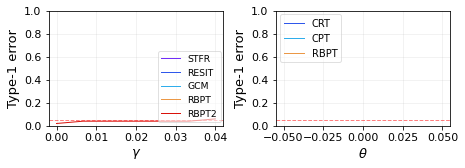

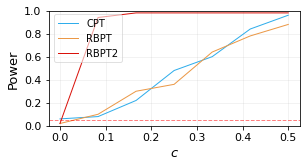

In [7]:
for p in ps:
    results_p = results.loc[results.p==p]
    for skew in skews:
        for loss in losses:
            print("\n************ {:} ************".format(p))
            ###
            plt.figure(figsize=(.9*8,1*2))
            plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
            plt.subplot(1, 2, 1)
            plot_type1(results_p, sett='type1_1', skew=skew, loss=loss, alpha=alpha, xlabel='$\gamma$', ylabel='Type-1 error', legend=True)
            plt.subplot(1, 2, 2)
            plot_type1(results_p, sett='type1_2', skew=skew, loss=loss, alpha=alpha, xlabel='$\\theta$', ylabel='Type-1 error', legend=True)
            plt.savefig('rebut_plots/2exp1_type1_{:}_{:}_{:}.png'.format(str(p),str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
            plt.show()

            ###
            plt.figure(figsize=(.9*5,1*2))
            plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
            plt.subplot(1, 1, 1)
            plot_power(results_p, skew=skew, loss=loss, alpha=alpha, xlabel='$c$', ylabel='Power', legend=True)
            plt.savefig('rebut_plots/2exp1_power_{:}_{:}_{:}.png'.format(str(p),str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
            plt.show()

In [8]:
p=10
results_p = results.loc[results.p==p]
columns_by = ['set','c','theta','skew','gamma','loss']
results_mean = results_p.groupby(by=columns_by).mean().reset_index()
results_std = results_p.groupby(by=columns_by).std().reset_index()

ind_row = (results_mean.set=='power')

In [9]:
results_p

,set,p,ba,c,theta,skew,gamma,loss,stfr,resit,gcm,crt,cpt,rbpt,rbpt2


In [10]:
results_mean.loc[ind_row].iloc[:,:].T

""
set
c
theta
skew
gamma
loss
p
ba
stfr
resit


In [11]:
results_std.loc[ind_row].iloc[:,4:].T

""
gamma
loss
p
ba
stfr
resit
gcm
crt
cpt
rbpt
